# 建立 KNN 模型

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 讀取 玻璃分類資料

In [2]:
## 讀取 玻璃分類 data
df = pd.read_csv('glass_type.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 切分訓練、測試資料集

In [4]:
from sklearn.model_selection import train_test_split
# 取得特徵(移除 y label)
X = df.drop(labels=['Type'] ,axis=1)
# 取得 y label
y = df['Type'].values
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 , random_state=5)
print(f'Length of training dataset: {len(X_train)} samples')
print(f'Length of testing dataset: {len(X_test)} samples')

Length of training dataset: 171 samples
Length of testing dataset: 43 samples


## 模型訓練

In [5]:
# 模型訓練
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=2)
knnModel.fit(X_train, y_train)

# 輸出模型準確率
print('訓練集準確率: ', knnModel.score(X_train, y_train))
print('測試集準確率: ',knnModel.score(X_test, y_test))

# 模型預測測試集的結果
y_pred = knnModel.predict(X_test)

訓練集準確率:  0.8421052631578947
測試集準確率:  0.7441860465116279


## 模型評估結果

In [6]:
# 輸出 Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('-'*50)

# 輸出 Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.80      0.80      0.80        15
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.75      0.71      0.73        43
weighted avg       0.77      0.74      0.76        43

--------------------------------------------------
Confusion Matrix:
[[12  1  3  0  0  0]
 [ 3 12  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  2  0  0  0  5]]


### 顯示資料集散佈圖

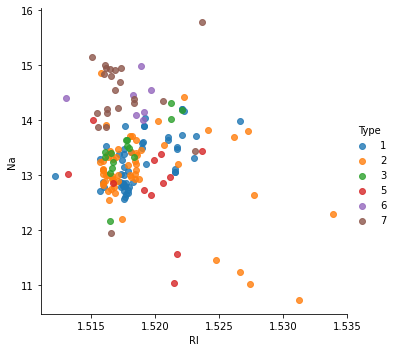

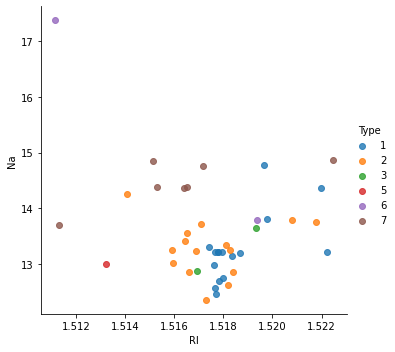

In [7]:
# 建立訓練集 DataFrme (包含x特徵與y label)
df_train = pd.DataFrame(X_train)
df_train['Type'] = y_train
# 建立測試集 DataFrme (包含x特徵與y label)
df_test = pd.DataFrame(X_test)
df_test['Type'] = y_test

# 訓練集特徵 "RI", "Na" 散佈圖
sns.lmplot("RI", "Na", hue='Type', data=df_train, fit_reg=False)
# 測試集特徵 "RI", "Na" 散佈圖
sns.lmplot("RI", "Na", hue='Type', data=df_test, fit_reg=False)

## 模型交叉驗證

<Figure size 432x288 with 0 Axes>

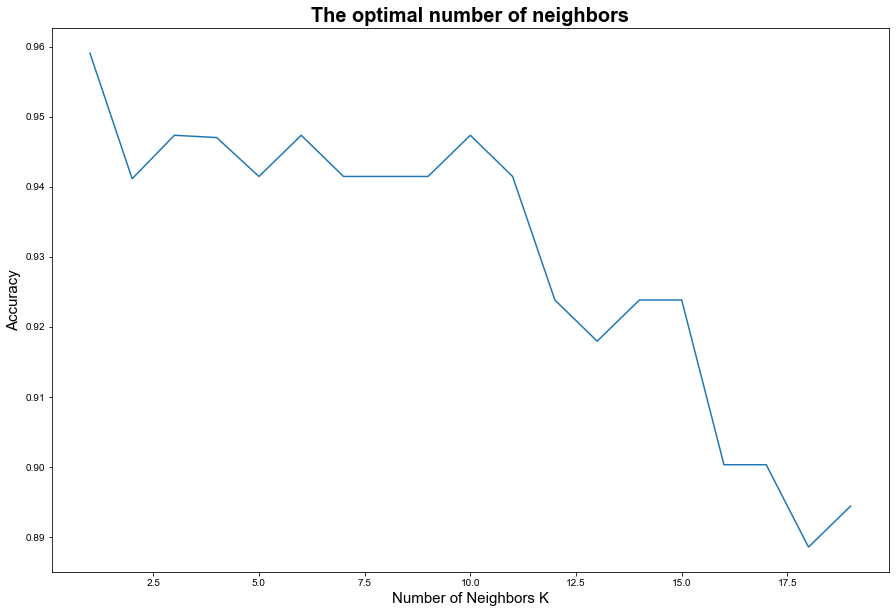

<Figure size 432x288 with 0 Axes>

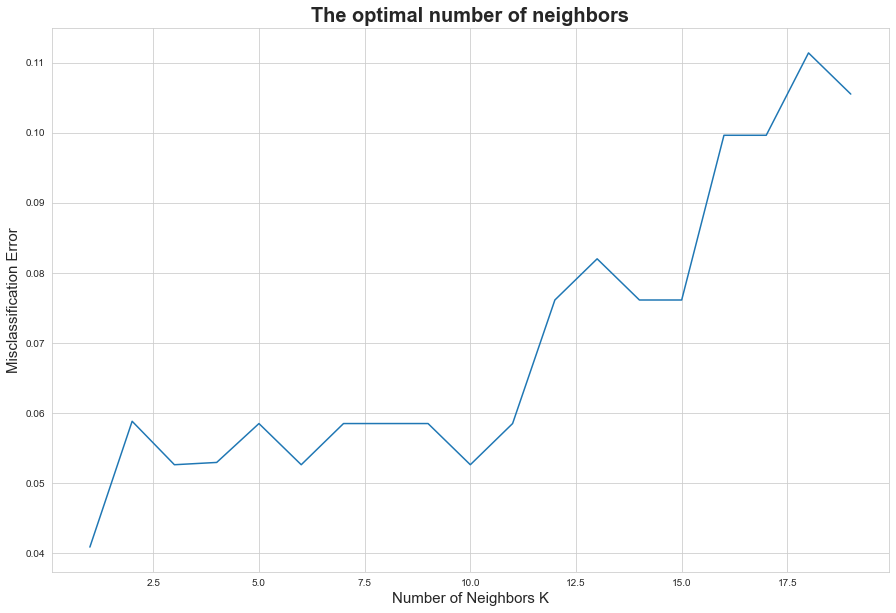

In [8]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN (K from 1 to 20)
k_list = list(range(1, 20, 1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation for each K
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# show each K's KNN result score
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)
plt.show()

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()